Import all libraries required.
1. Cv2 - OpenCV Library for performing image processing tasks
2. numpy = For matrix manipulation


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display as colab
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

**Task 1** : How to read an image using cv2 and how to display image.

***Note***: You can use cv2.imshow() function in local jupiter/python environment in colab it won't run as colab has environment restriction, hence cv2_imshow.

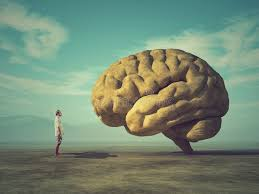

In [ ]:
img = cv2.imread('/content/sampleImage2.jpeg')
cv2_imshow(img)

**Task 2** : Get to know image properties.

Visit the link : https://scikit-image.org/docs/stable/user_guide/data_types.html to get to know various image storage formats.

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(img.dtype)
# Check the height of img
print(img.shape[0])
# Check the width of img
print(img.shape[1])
# Check the number of channels of the img
print(img.shape[2])
# Access a valid pixel position (e.g., row 100, column 120)
print(img [150, 200])

uint8
194
259
3
[92 97 95]


**Task 3** : How to resize the image.
Below code scales down resolution of original image by half i.e. reduce size by 50%.

***Classwork*** : Resize image to dimensions below
1. 500 X 350 px
2. 350 X 300 px
3. 75% of width X 25% of height
4. Resize to 25% of both width and height
5. Resize by 110% of both width and height
6. Resize to 200% of both width and height

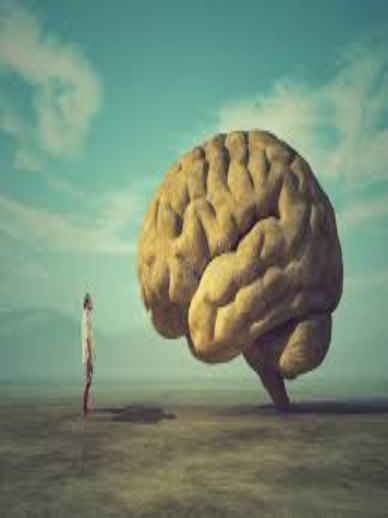

In [ ]:
# resized_image = cv2.resize(img, (img.shape[0] // 2,img.shape[1]//2))
# cv2_imshow(resized_image)

# resized_image=cv2.resize(img,(350,300))
# cv2_imshow(resize_image)

# resized_image=cv2.resize(img,(500,350))
# cv2_imshow(resize_image)

# resized_image=cv2.resize(img, (int(img.shape[1] * 0.75), int(img.shape[0] * 0.25)))
# cv2_imshow(resized_image)

# resized_image=cv2.resize(img, (int(img.shape[0]*0.25), int(img.shape[1]*0.25)))
# cv2_imshow(resized_image);

# resized_image=cv2.resize(img, (int(img.shape[0]*1.1), int(img.shape[1]*1.1)))
# cv2_imshow(resized_image)

resized_image=cv2.resize(img, (int(img.shape[0]*2), int(img.shape[1]*2)))
cv2_imshow(resized_image)

**Task 4** : Since we know that a grayscale image is nothing but a matrix having each cell (pixel) value between 0 to 255.
Let's create a random array and print it as an image.

In [ ]:
# Create a 200x200 array with random values between 0 and 255
random_array = np.random.randint(0, 256, size=(200, 200), dtype=np.uint8)
print(random_array)

[[216  46  88 ...  19 104 144]
 [ 80 123   0 ...  75  54  92]
 [ 44  29  82 ... 185 170  65]
 ...
 [235 132  71 ... 191 212 238]
 [  9 230  64 ... 255 252  31]
 [ 76 247 102 ... 108  78 136]]


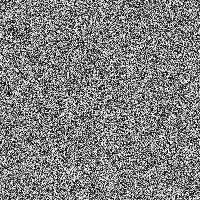

In [ ]:
cv2_imshow(random_array)

**Classwork** : Create a random array of size 200 X 200 such that
1. It has 3 intensities 0, 125, 255 where 1/3rd of image is of 0 intensity, 1/3rd of 125 and 1/3rd of 255.
2. Create a horizontal gradient image with pixel intensity range as 0,1,3,7,15,31,63,127,255
3. Create a vertical gradient image with pixel intensity range as 0,1,3,7,15,31,63,127,255
4. Create a diagonal grdient image with direction starting from (0,0) pixel to (199,199).
5. Create a diagonal grdient image with direction starting from (199,0) pixel to (0,199).

**Task 5** : RGB to grayscale image conversion

***Classwork*** :
1. Convert an RGB image to grayscale and display negative of that image.
2. Convert an RGB image to grayscale and multiply each pixel value of this image by 2, then display it.
3. Convert an RGB image to grayscale and divide each pixel value of this image by 2, then display it.
4. Convert an RGB image to grayscale and use log formula on each pixel value, then display it. Hint : S(r) = 2*log(1+r).
5. Convert an RGB image to grayscale and use power-law formula on each pixel value, then display it. Hint : S(r) = 2*pow(r,2) and S(r) = 2*pow(r,0.25).

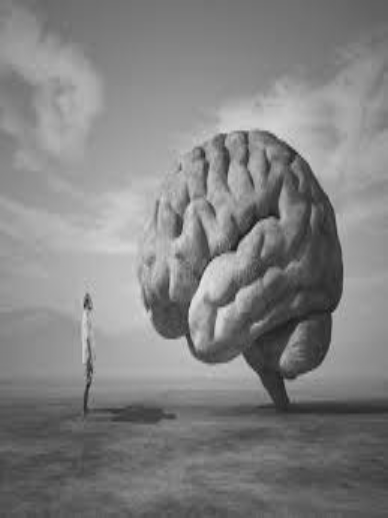

In [ ]:
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

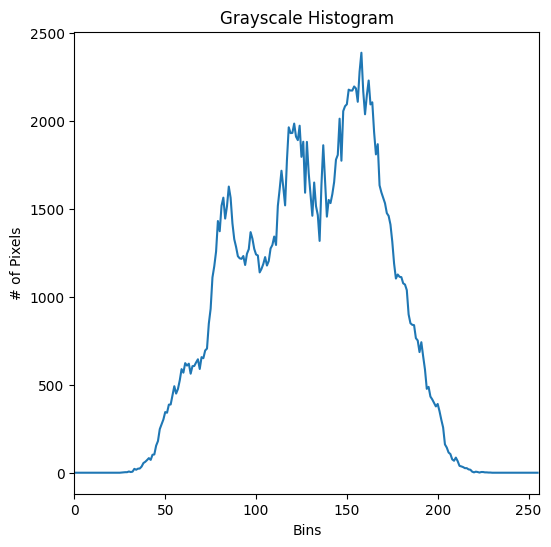

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib as plt


def plot_histogram(img,str):
  hist = cv2.calcHist([img],[0],None,[256],[0,256])
  # initializes a new figure object where you can add plots, titles, labels, and other elements.
  plt.figure(figsize=(6,6),dpi=100) # Now plt is defined and can be used
  # title of figure
  plt.title(str)
  # label x-axis
  plt.xlabel("Bins")
  # label y-axis
  plt.ylabel("# of Pixels")
  # plot histogram on figure
  plt.plot(hist)
  # set range of x-axis
  plt.xlim([0, 256])
  # display plot
  plt.show()
plot_histogram(img=gray_image,str="Grayscale Histogram")

18 235
[[118 118 119 ...  90  90  90]
 [121 122 122 ...  90  90  90]
 [123 123 123 ...  91  91  91]
 ...
 [ 78  78  78 ...  84  84  84]
 [ 69  65  64 ...  68  68  68]
 [ 69  65  64 ...  68  68  68]]


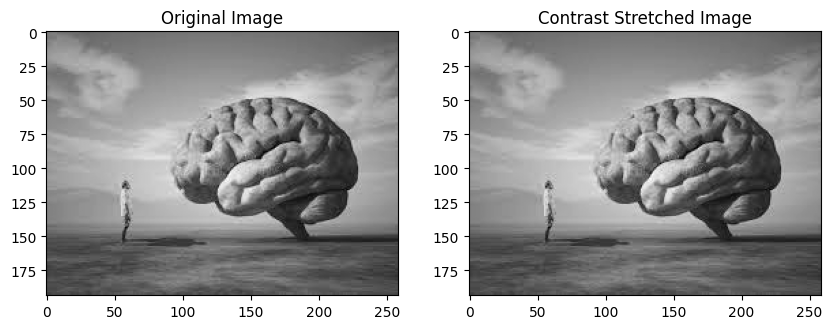

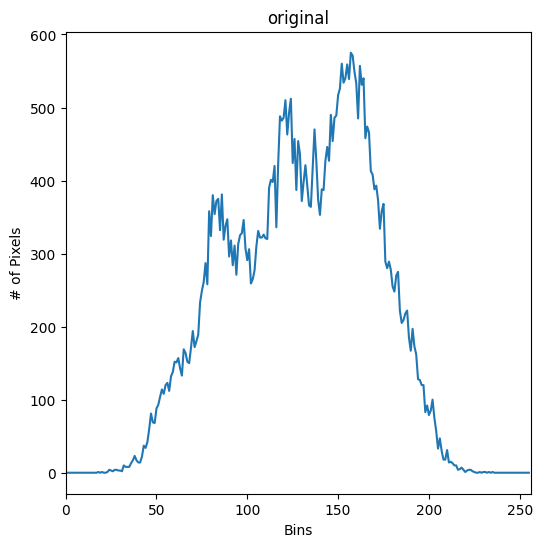

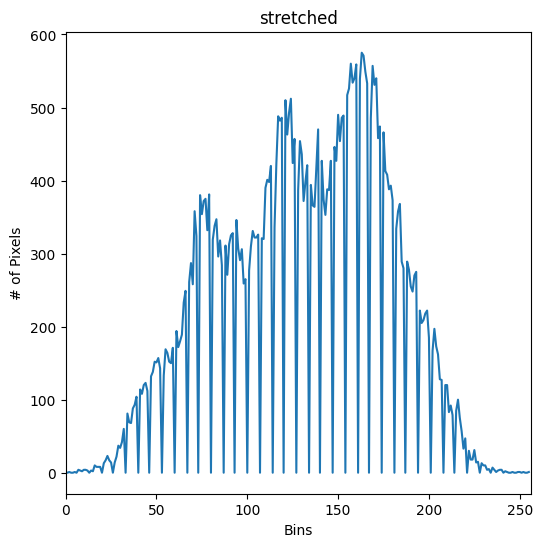

In [ ]:
def contrast_stretching(img):
    # Check if the image was loaded successfully
    if img is None:
        print("Error: Could not load the image.")
        return  # Exit the function if image loading failed

    # Find the minimum and maximum pixel values
    r_min, r_max = np.min(img), np.max(img)
    print(r_min,r_max)
    # Apply contrast stretching
    stretched_img = ((img - r_min) / (r_max - r_min) * 255).astype(np.uint8)
    print(stretched_img)
    # Display the original and stretched images for comparison
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Contrast Stretched Image')
    plt.imshow(stretched_img, cmap='gray')

    plt.show()

    plot_histogram(img,"original")
    plot_histogram(stretched_img,"stretched")

# Calling function contrast_stretching on above generated gray_image
img0 = cv2.imread('/content/sampleImage2.jpeg', cv2.IMREAD_GRAYSCALE)  # Make sure the image path is correct
# Check if image loading was successful before calling contrast_stretching
if img0 is not None:
    contrast_stretching(img0)
else:
    print("Error: Could not load image '/content/sampleImage2.jpeg'")

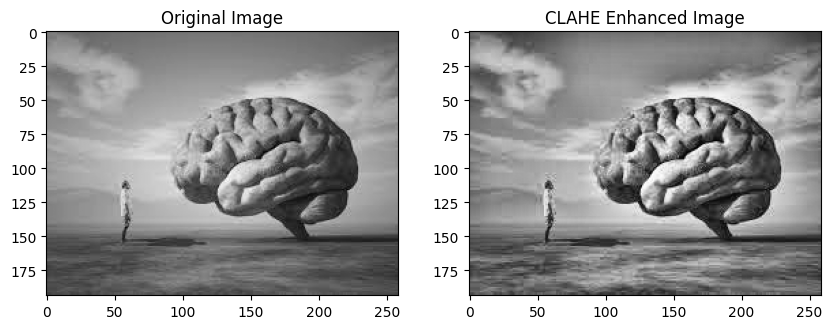

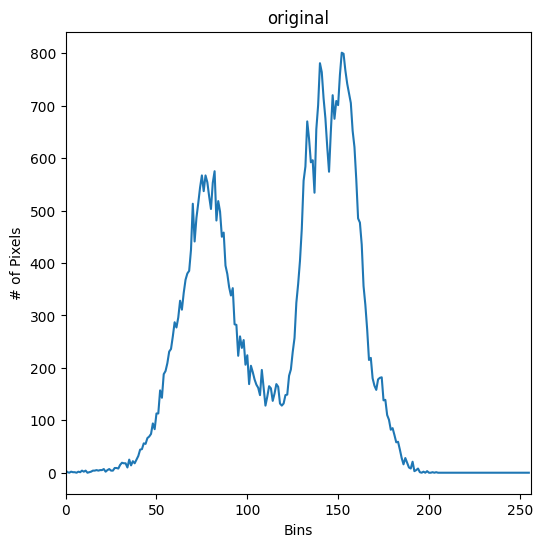

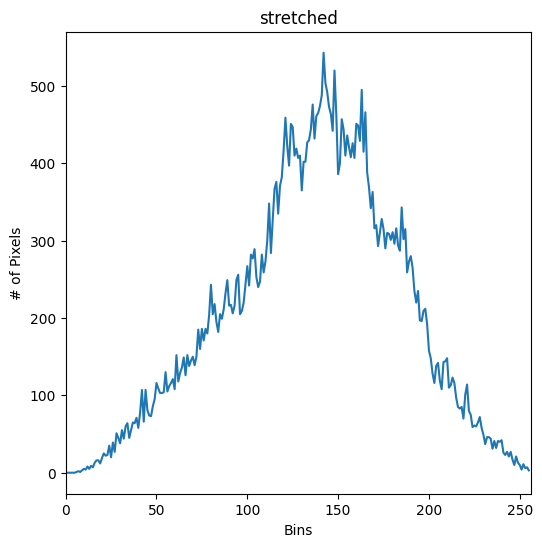

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_CLAHE(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced_img = clahe.apply(img)
    return enhanced_img

# Load the image
img0 = cv2.imread('/content/sampleImage2.jpeg', cv2.IMREAD_GRAYSCALE)

if img0 is not None:
    contrast_stretched = apply_CLAHE(img0)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img0, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("CLAHE Enhanced Image")
    plt.imshow(contrast_stretched, cmap='gray')

    plt.show()

    plot_histogram(img,"original")
    plot_histogram(contrast_stretched,"stretched")
else:
    print("Error: Could not load image.")


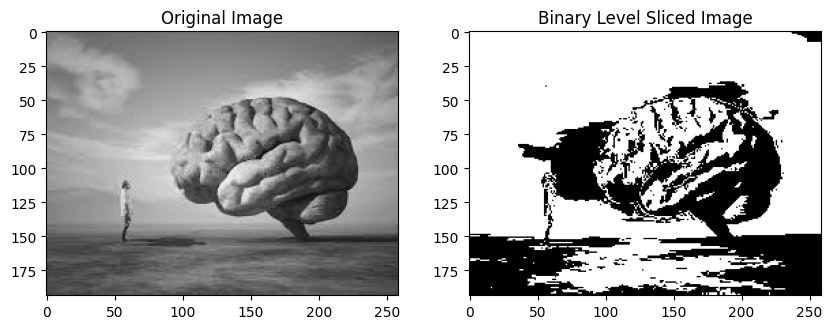

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def level_slicing(img, r_a, r_b):
    """Applies binary level slicing where pixels within [r_a, r_b] are set to 1, others to 0."""
    sliced_img = np.where((img >= r_a) & (img <= r_b), 1, 0).astype(np.uint8)
    return sliced_img

# Load grayscale image
img0 = cv2.imread('/content/sampleImage2.jpeg', cv2.IMREAD_GRAYSCALE)

if img0 is not None:
    r_a, r_b = 100, 180  # Define intensity range

    sliced_img = level_slicing(img0, r_a, r_b)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img0, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Binary Level Sliced Image")
    plt.imshow(sliced_img, cmap='gray')

    plt.show()
else:
    print("Error: Could not load image.")


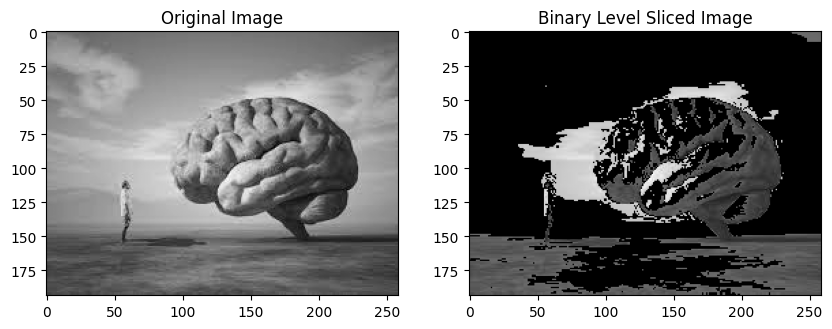

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def level_slicing(img, r_a, r_b):
    """Applies binary level slicing where pixels within [r_a, r_b] are set to 1, others to 0."""
    sliced_img = np.where((img >= r_a) & (img <= r_b), 1, img).astype(np.uint8)
    return sliced_img

# Load grayscale image
img0 = cv2.imread('/content/sampleImage2.jpeg', cv2.IMREAD_GRAYSCALE)

if img0 is not None:
    r_a, r_b = 100, 180  # Define intensity range

    sliced_img = level_slicing(img0, r_a, r_b)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img0, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Binary Level Sliced Image")
    plt.imshow(sliced_img, cmap='gray')

    plt.show()
else:
    print("Error: Could not load image.")
